In [1]:
#THIS CODE ONLY DO THE WHOLE DATA TRAINING, NO CROSS_VALIDATION AND FEATURE SELECTION
import pandas as pd
#numpy-1.21.4
import numpy as np
import newSom
import experiment
import dataset_read
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt
import collections
import warnings
from fcmeans import FCM
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataread = dataset_read.DATAREAD()

In [4]:
csv = pd.read_csv("Netflix Userbase.csv")
csv = csv.drop(columns=['User ID','Plan Duration'])


dataread.label_encoding(csv,"Subscription Type")
dataread.label_encoding(csv,"Country")
dataread.label_encoding(csv,"Gender")
dataread.label_encoding(csv,"Device")


csv_test = csv.sample(int(csv.shape[0]*0.3))
csv_training = csv.drop(csv_test.index,axis = 0)




dataread.initializedataset(csv,csv_training,csv_test,"Subscription Type")

#dataread.data_train_discrete

self.continuous_feature_num 3
self.data_discrete_indexes ['Monthly Revenue', 'Country', 'Gender', 'Device'] 


Neuron/Cluster number: 25
accuracy_score_orignial 0.47333333333333333
recall_score_original 0.4281781927828032
precision_score_original 0.31534867319051396
f1_score_original 0.35102314254257716
accuracy_score_sog 0.5133333333333333
recall_score_sog 0.4774528540796414
precision_score_sog 0.5520770707422291
f1_score_sog 0.4516148571825769
Neuron/Cluster number: 30


C:\Users\fooli\anaconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy_score_orignial 0.4706666666666667
recall_score_original 0.42648066800386614
precision_score_original 0.5766046348960921
f1_score_original 0.35695304085808716
accuracy_score_sog 0.5373333333333333
recall_score_sog 0.4994495224725746
precision_score_sog 0.5737935889163231
f1_score_sog 0.47794456569353977
Not good precision_score_original !!!!!
Neuron/Cluster number: 35
accuracy_score_orignial 0.5106666666666667
recall_score_original 0.4710034516570845
precision_score_original 0.5741964200117781
f1_score_original 0.4325204304087588
accuracy_score_sog 0.5706666666666667
recall_score_sog 0.5362034926668717
precision_score_sog 0.6017568050661355
f1_score_sog 0.5024604757429185
Neuron/Cluster number: 40
accuracy_score_orignial 0.504
recall_score_original 0.46259092474441177
precision_score_original 0.5507870084376587
f1_score_original 0.4269031365166998
accuracy_score_sog 0.5893333333333334
recall_score_sog 0.5581817592322408
precision_score_sog 0.6404580434812904
f1_score_sog 0.5293

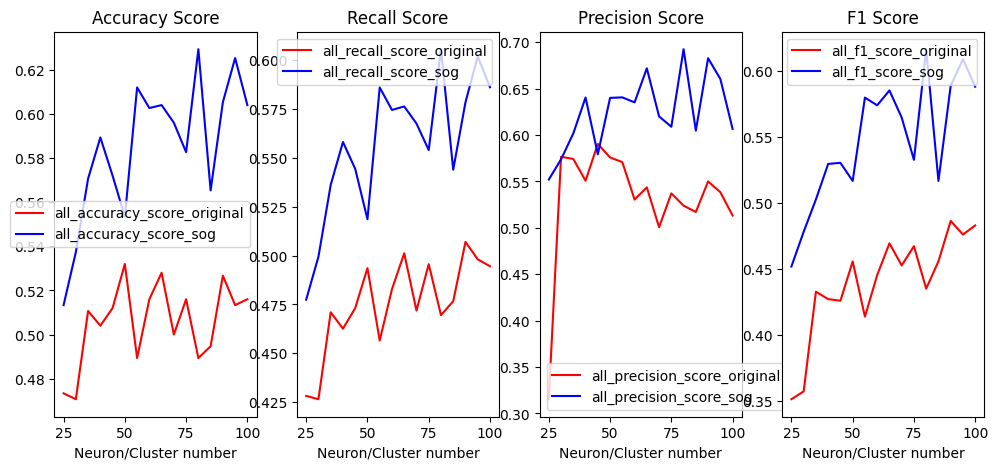

Accuracy Score T-Test
                      Variable     N      Mean        SD        SE  95% Conf.  \
0  all_accuracy_score_original  16.0  0.505750  0.018325  0.004581   0.495985   
1       all_accuracy_score_sog  16.0  0.585167  0.031713  0.007928   0.568268   
2                     combined  32.0  0.545458  0.047715  0.008435   0.528255   

   Interval  
0  0.515515  
1  0.602065  
2  0.562662  
                                  Independent t-test  results
0  Difference (all_accuracy_score_original - all_...  -0.0794
1                              Degrees of freedom =   30.0000
2                                               t =   -8.6730
3                           Two side test p value =    0.0000
4                          Difference < 0 p value =    0.0000
5                          Difference > 0 p value =    1.0000
6                                       Cohen's d =   -3.0664
7                                       Hedge's g =   -2.9891
8                                  Glas

In [6]:
import experiment
unstable_repeat_num= 30
best_num =26
scope_num = 100
class_num = 25
interval = 5

features_chosen = [0,1,2]
feature_combination_number = 2
experiment = experiment.Experiment()
experiment.UTtest_Discrete(dataread,class_num,scope_num,interval,features_chosen,feature_combination_number)

#mutiple_feature_group_union (15.0, 0.0)  len value 400

[[1.80176588e-02 9.99827135e-01 7.53799513e-04 4.52722131e-03]
 [9.99600865e-01 1.80997931e-02 7.62045415e-03 2.03085472e-02]
 [2.03381033e-02 4.16528856e-03 6.45014511e-03 9.99763676e-01]
 [7.73540229e-03 8.64774480e-04 9.99949877e-01 6.29758870e-03]]
Sorted feature index for component 0 [1, 3, 2, 0]
Sorted imporance porporation for component 0  [0.955922811786982, 0.019449419819778855, 0.01723036832121891, 0.007397400072019989]
Sorted feature index for component 1 [3, 2, 1, 0]
Sorted imporance porporation for component 1  [0.9773892193041657, 0.01769360129676009, 0.004071812010463172, 0.0008453673886112667]
Sorted feature index for component 2 [0, 2, 1, 3]
Sorted imporance porporation for component 2  [0.9853914322390662, 0.0075095066251662755, 0.00635623632173482, 0.0007428248140325508]
Sorted feature index for component 3 [0, 2, 3, 1]
Sorted imporance porporation for component 3  [0.9697997411778488, 0.019699879377421587, 0.006108843561924845, 0.0043915358828048034]
[0.66957023 0.2

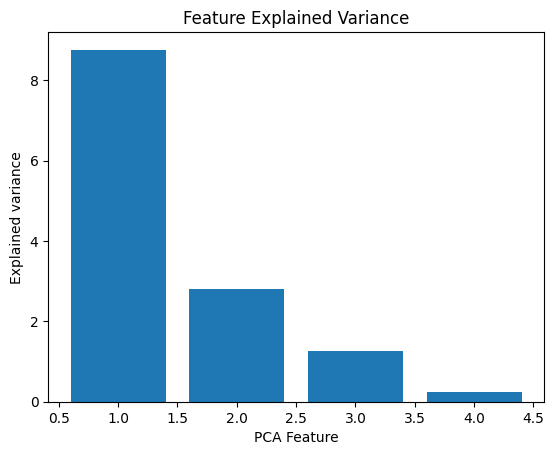

In [5]:
dataread.PCA_Comparision()  #component 123 2|3|1